In [1]:
import train
from analysis import performance

import matplotlib.pyplot as plt
import tools
import numpy as np
from task import generate_trials, rule_name, get_dist
%load_ext autoreload
%autoreload 2

In [3]:
train.train(model_dir='laconeu_test', 
            hp={'learning_rate': 0.001, 
                'n_rnn': 32,#512, 16384,8192,1024
                # 'w_rec_init': 'randgauss',#'randortho'
                # 'b_rec_init': 'uniform',
                'rule_strength': 1.0,
                'no_rule': False,
                'target_perf':0.8,
                'activation': 'softplus',
                'alpha':0.2},
            ruleset='all',
            rule_trains = ['fdanti', 'dm1'],
            trainables='all')#,trainables='bias')

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


batch_size_train     = 64
batch_size_test      = 512
in_type              = normal
rnn_type             = LeakyRNN
use_separate_input   = False
loss_type            = lsq
optimizer            = adam
activation           = softplus
tau                  = 100
dt                   = 20
alpha                = 0.2
sigma_rec            = 0.05
sigma_x              = 0.01
w_rec_init           = randortho
w_in_init            = randgauss
w_out_init           = glorot_uniform
b_rec_init           = zeros
b_out_init           = zeros
l1_h                 = 0
l2_h                 = 0
l1_weight            = 0
l2_weight            = 0
l2_weight_init       = 0
p_weight_train       = None
target_perf          = 0.8
n_eachring           = 32
num_ring             = 2
n_rule               = 20
rule_start           = 65
n_input              = 85
n_output             = 33
n_rnn                = 32
ruleset              = all
save_name            = test
learning_rate        = 0.001
c_intsyn             = 0
k

2025-01-14 09:23:37.479545: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2025-01-14 09:23:37.509368: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3000000000 Hz
2025-01-14 09:23:37.514206: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55e92a976d40 executing computations on platform Host. Devices:
2025-01-14 09:23:37.514240: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2025-01-14 09:23:37.727422: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55e92a9cd3e0 executing computations on platform CUDA. Devices:
2025-01-14 09:23:37.727450: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2025-01-14 09:23:37.727456: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (1): Quadro 

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(117, 32) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(32, 33) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32_ref>
Trial       0  | Time 1.02 s  | Now training fdanti & dm1


2025-01-14 09:23:38.541892: I tensorflow/stream_executor/dso_loader.cc:152] successfully opened CUDA library libcublas.so.10.0 locally


fdanti         | cost 1.081010| c_reg 0.000000  | perf 0.18
dm1            | cost 1.160933| c_reg 0.000000  | perf 0.17
Model saved in file: laconeu_test/model.ckpt
Optimization interrupted by user
Optimization finished!


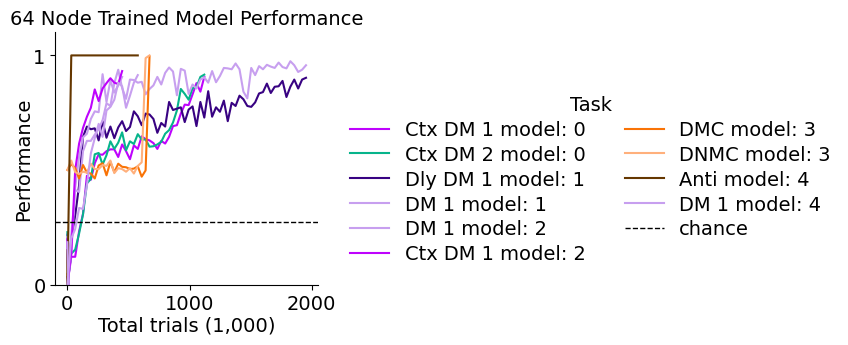

In [4]:

_rule_color = {
    'reactgo': 'green',
            'delaygo': 'olive',
            'fdgo': 'forest green',
            'reactanti': 'mustard',
            'delayanti': 'tan',
            'fdanti': 'brown',
            'dm1': 'lavender',
            'dm2': 'aqua',
            'contextdm1': 'bright purple',
            'contextdm2': 'green blue',
            'multidm': 'blue',
            'delaydm1': 'indigo',
            'delaydm2': 'grey blue',
            'contextdelaydm1': 'royal purple',
            'contextdelaydm2': 'dark cyan',
            'multidelaydm': 'royal blue',
            'dmsgo': 'red',
            'dmsnogo': 'rose',
            'dmcgo': 'orange',
            'dmcnogo': 'peach'
            }

dm_family = ['dm1', 'dm2', 'contextdm1', 'contextdm2', 'multidm', 'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm']
go_family = ['reactgo', 'delaygo', 'fdgo', 'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']
anti_family = ['reactanti', 'delayanti', 'fdanti']

rule_color = {k: 'xkcd:'+v for k, v in _rule_color.items()}

def plot_performanceprogress(model_dirs, title=None):

    fs = 14 # fontsize
    w = 7.5
    h = 4.2
    transparent = False

    fig = plt.figure(figsize=(w,h))
    ax = fig.add_axes([0.1,0.25,0.35,0.6])
    lines = list()
    labels = list()

    rules = []
    x_plots = []
    costs = []
    perfs = []
    model = []
    for i, model_dir in enumerate(model_dirs):
        # Plot Training Progress
        log = tools.load_log(model_dir)
        hp = tools.load_hp(model_dir)
        rules_mod = hp['rules']
        trials = log['trials']
        x_plot = np.array(trials)/1000.
        
        for rule in rules_mod:
            cost = np.log10(log['cost_'+rule])
            perf = log['perf_'+rule]
        
            rules.append(rule)
            x_plots.append(x_plot)
            costs.append(cost)
            perfs.append(perf)
            model.append(i)
            

    for i, rule in enumerate(rules):
        # line = ax1.plot(x_plot, np.log10(cost_tests[rule]),color=color_rules[i%26])
        # ax2.plot(x_plot, perf_tests[rule],color=color_rules[i%26])
        line = ax.plot(x_plots[i], costs[i],
                    color=rule_color[rule])
        ax.plot(x_plots[i], perfs[i], color=rule_color[rule])
        lines.append(line[0])
        label = rule_name[rule] + ' model: ' + str(model[i])
        labels.append(label)

    ax.tick_params(axis='both', which='major', labelsize=fs)
    line = ax.axhline(0.275, color='black', linestyle='--', linewidth=1.)
    lines.append(line)
    labels.append('chance')
    ax.set_ylim([0, 1.1])
    ax.set_xlabel('Total trials (1,000)',fontsize=fs, labelpad=2)
    ax.set_ylabel('Performance',fontsize=fs, labelpad=0)
    ax.locator_params(axis='x', nbins=3)
    ax.set_yticks([0,1])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    if title is not None:
        ax.set_title(title,fontsize=fs)
    lg = fig.legend(lines, labels, title='Task',ncol=2,bbox_to_anchor=(0.47,0.5),
                    fontsize=fs,labelspacing=0.3,loc=6,frameon=False)
    plt.setp(lg.get_title(),fontsize=fs)
    # sfn = model_dir + '/figure/Performance_Progress'
    # plt.savefig(sfn, transparent=transparent)
    plt.show()

#get list of all file names with retrain_rnnbias_outputweights
import os

# model_dirs = ['retrain_rnnbias_outputweights_contextdm1',
#                'retrain_rnnbias_outputweights_contextdm2', 
#                'retrain_rnnbias_outputweights_multidm',
#                'retrain_rnnbias_outputweights_delaydm1',
#                'retrain_rnnbias_outputweights_delaydm2',
#                'retrain_rnnbias_outputweights_reactgo',
#                'retrain_rnnbias_outputweights_fdgo',
#                'retrain_rnnbias_outputweights_dmsgo',
#                'retrain_rnnbias_outputweights_dmcgo',
#                'train_all_params_contextdelaydm1']

#split model dirs into those that conntain
#dm, go, and anti
# dm_dirs = [d for d in model_dirs if d.split('_')[-1] in dm_family]
# go_dirs = [d for d in model_dirs if d.split('_')[-1] in go_family]
# anti_dirs = [d for d in model_dirs if d.split('_')[-1] in anti_family]

# plot_performanceprogress(dm_dirs, title='DM Family')
# plot_performanceprogress(go_dirs, title='GO Family')
# plot_performanceprogress(anti_dirs, title='ANTI Family')

model_dirs = ['laconeu_[\'contextdm1\', \'contextdm2\']',
              'laconeu_[\'delaydm1\', \'dm1\']',
              'laconeu_[\'dm1\', \'contextdm1\']',
              'laconeu_[\'dmcgo\', \'dmcnogo\']',
              'laconeu_[\'fdanti\', \'dm1\']']

plot_performanceprogress(model_dirs, title='64 Node Trained Model Performance')

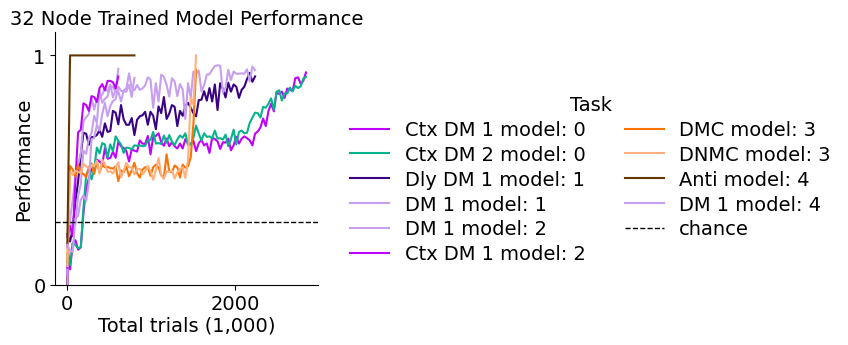

In [5]:

_rule_color = {
    'reactgo': 'green',
            'delaygo': 'olive',
            'fdgo': 'forest green',
            'reactanti': 'mustard',
            'delayanti': 'tan',
            'fdanti': 'brown',
            'dm1': 'lavender',
            'dm2': 'aqua',
            'contextdm1': 'bright purple',
            'contextdm2': 'green blue',
            'multidm': 'blue',
            'delaydm1': 'indigo',
            'delaydm2': 'grey blue',
            'contextdelaydm1': 'royal purple',
            'contextdelaydm2': 'dark cyan',
            'multidelaydm': 'royal blue',
            'dmsgo': 'red',
            'dmsnogo': 'rose',
            'dmcgo': 'orange',
            'dmcnogo': 'peach'
            }

dm_family = ['dm1', 'dm2', 'contextdm1', 'contextdm2', 'multidm', 'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm']
go_family = ['reactgo', 'delaygo', 'fdgo', 'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']
anti_family = ['reactanti', 'delayanti', 'fdanti']

rule_color = {k: 'xkcd:'+v for k, v in _rule_color.items()}

def plot_performanceprogress(model_dirs, title=None):

    fs = 14 # fontsize
    w = 7.5
    h = 4.2
    transparent = False

    fig = plt.figure(figsize=(w,h))
    ax = fig.add_axes([0.1,0.25,0.35,0.6])
    lines = list()
    labels = list()

    rules = []
    x_plots = []
    costs = []
    perfs = []
    model = []
    for i, model_dir in enumerate(model_dirs):
        # Plot Training Progress
        log = tools.load_log(model_dir)
        hp = tools.load_hp(model_dir)
        rules_mod = hp['rules']
        trials = log['trials']
        x_plot = np.array(trials)/1000.
        
        for rule in rules_mod:
            cost = np.log10(log['cost_'+rule])
            perf = log['perf_'+rule]
        
            rules.append(rule)
            x_plots.append(x_plot)
            costs.append(cost)
            perfs.append(perf)
            model.append(i)
            

    for i, rule in enumerate(rules):
        # line = ax1.plot(x_plot, np.log10(cost_tests[rule]),color=color_rules[i%26])
        # ax2.plot(x_plot, perf_tests[rule],color=color_rules[i%26])
        line = ax.plot(x_plots[i], costs[i],
                    color=rule_color[rule])
        ax.plot(x_plots[i], perfs[i], color=rule_color[rule])
        lines.append(line[0])
        label = rule_name[rule] + ' model: ' + str(model[i])
        labels.append(label)

    ax.tick_params(axis='both', which='major', labelsize=fs)
    line = ax.axhline(0.275, color='black', linestyle='--', linewidth=1.)
    lines.append(line)
    labels.append('chance')
    ax.set_ylim([0, 1.1])
    ax.set_xlabel('Total trials (1,000)',fontsize=fs, labelpad=2)
    ax.set_ylabel('Performance',fontsize=fs, labelpad=0)
    ax.locator_params(axis='x', nbins=3)
    ax.set_yticks([0,1])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    if title is not None:
        ax.set_title(title,fontsize=fs)
    lg = fig.legend(lines, labels, title='Task',ncol=2,bbox_to_anchor=(0.47,0.5),
                    fontsize=fs,labelspacing=0.3,loc=6,frameon=False)
    plt.setp(lg.get_title(),fontsize=fs)
    # sfn = model_dir + '/figure/Performance_Progress'
    # plt.savefig(sfn, transparent=transparent)
    plt.show()

#get list of all file names with retrain_rnnbias_outputweights
import os

# model_dirs = ['retrain_rnnbias_outputweights_contextdm1',
#                'retrain_rnnbias_outputweights_contextdm2', 
#                'retrain_rnnbias_outputweights_multidm',
#                'retrain_rnnbias_outputweights_delaydm1',
#                'retrain_rnnbias_outputweights_delaydm2',
#                'retrain_rnnbias_outputweights_reactgo',
#                'retrain_rnnbias_outputweights_fdgo',
#                'retrain_rnnbias_outputweights_dmsgo',
#                'retrain_rnnbias_outputweights_dmcgo',
#                'train_all_params_contextdelaydm1']

#split model dirs into those that conntain
#dm, go, and anti
# dm_dirs = [d for d in model_dirs if d.split('_')[-1] in dm_family]
# go_dirs = [d for d in model_dirs if d.split('_')[-1] in go_family]
# anti_dirs = [d for d in model_dirs if d.split('_')[-1] in anti_family]

# plot_performanceprogress(dm_dirs, title='DM Family')
# plot_performanceprogress(go_dirs, title='GO Family')
# plot_performanceprogress(anti_dirs, title='ANTI Family')

model_dirs = ['laconeu_[\'contextdm1\', \'contextdm2\']_32',
              'laconeu_[\'delaydm1\', \'dm1\']_32',
              'laconeu_[\'dm1\', \'contextdm1\']_32',
              'laconeu_[\'dmcgo\', \'dmcnogo\']_32',
              'laconeu_[\'fdanti\', \'dm1\']_32']

plot_performanceprogress(model_dirs, title='32 Node Trained Model Performance')

In [7]:
from network import Model
import tensorflow as tf

pre_trained_model = Model('train_all_params_multidelay')

with tf.Session() as sess:
    pre_trained_model.restore()
    # get all connection weights and biases as tensorflow variables
    var_list = pre_trained_model.var_list
    # evaluate the parameters after training
    pre_trained_params = [sess.run(var) for var in var_list]
    # get name of each variable
    pre_trained_params_names  = [var.name for var in var_list]

print(pre_trained_params_names)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from train_all_params_multidelay/model.ckpt
Model restored from file: train_all_params_multidelay/model.ckpt
['rnn/leaky_rnn_cell/kernel:0', 'rnn/leaky_rnn_cell/bias:0', 'output/weights:0', 'output/biases:0']


2024-08-09 09:30:32.836878: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-08-09 09:30:32.836933: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-09 09:30:32.836938: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-08-09 09:30:32.836941: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-08-09 09:30:32.836943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-08-09 09:30:32.837044: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15203 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-08-09 09:30:32.837326: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15203 M

Overwrite original dt with 1.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(323, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 33) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from train_all_params/model.ckpt
Model restored from file: train_all_params/model.ckpt


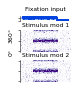

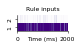

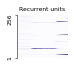

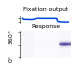

In [4]:
import tools
from analysis import performance
from analysis import standard_analysis
from analysis import clustering
from analysis import variance
from analysis import taskset
from analysis import varyhp
from analysis import data_analysis
from analysis import contextdm_analysis
from analysis import posttrain_analysis

standard_analysis.schematic_plot(model_dir='train_all_params', rule='contextdm1')

In [4]:
train.train(model_dir='retrain_rnnbias_outputlayer_contextdm1', 
            hp={'learning_rate': 0.001, 
                'n_rnn': 1024,#1024, 16384,8192
                'b_rec_init': 'uniform',
                # 'w_rec_init': 'randgauss',#'randortho'
                'rule_strength': 0.0,
                'no_rule': True,
                'target_perf':0.98,
                'activation': 'softplus',
                'alpha':0.2},#'relu'
            ruleset='all',
            rule_trains = ['contextdm1'],#'fdgo',contextdm1,dm1,dmsgo
            pretrained_dir = 'train_all_params_multidelay',
            apply_pretrained_params = ['rnn/leaky_rnn_cell/kernel:0','output/weights:0','output/biases:0'],#initialize ins and rec weights
            trainables='rnn_bias_and_output_layer')


INFO:tensorflow:Restoring parameters from train_all_params_multidelay/model.ckpt


2024-08-09 17:55:06.654428: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-08-09 17:55:06.654497: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-09 17:55:06.654501: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-08-09 17:55:06.654505: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-08-09 17:55:06.654520: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-08-09 17:55:06.654639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15203 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-08-09 17:55:06.654860: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15203 M

Model restored from file: train_all_params_multidelay/model.ckpt
batch_size_train     = 64
batch_size_test      = 512
in_type              = normal
rnn_type             = LeakyRNN
use_separate_input   = False
loss_type            = lsq
optimizer            = adam
activation           = softplus
tau                  = 100
dt                   = 20
alpha                = 0.2
sigma_rec            = 0.05
sigma_x              = 0.01
w_rec_init           = [[ 0.13653165 -0.10874186 -0.08851403 ... -0.21479842 -0.08225694
  -0.16772223]
 [-0.07662565 -0.09931163 -0.06426609 ... -0.08459357 -0.10583629
  -0.06098421]
 [-0.06484535 -0.07599788 -0.09538527 ... -0.08452167 -0.132615
   0.00125962]
 ...
 [-0.06285541 -0.08552465 -0.09795533 ... -0.03408048 -0.06164267
  -0.08364829]
 [-0.01662019 -0.09928936 -0.06111877 ... -0.05880495 -0.1352779
   0.05953628]
 [-0.03675343 -0.05482562 -0.07251727 ... -0.07776637 -0.14663838
   0.28555685]]
w_in_init            = [[ 0.42963073 -0.01981662  0.0808

2024-08-09 17:55:07.003831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-08-09 17:55:07.003871: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-09 17:55:07.003876: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-08-09 17:55:07.003880: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-08-09 17:55:07.003882: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-08-09 17:55:07.003968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15203 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-08-09 17:55:07.004169: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15203 M

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(1024, 33) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32_ref>
Trial       0  | Time 0.25 s  | Now training contextdm1
contextdm1     | cost 0.577675| c_reg 0.000000  | perf 0.26
Model saved in file: retrain_rnnbias_outputlayer_contextdm1/model.ckpt
Trial   32000  | Time 34.42 s  | Now training contextdm1
contextdm1     | cost 0.204557| c_reg 0.000000  | perf 0.32
Model saved in file: retrain_rnnbias_outputlayer_contextdm1/model.ckpt
Trial   64000  | Time 69.35 s  | Now training contextdm1
contextdm1     | cost 0.200078| c_reg 0.000000  | perf 0.32
Model saved in file: retrain_rnnbias_outputlayer_contextdm1/model.ckpt
Trial   96000  | Time 104.48 s  | Now training contextdm1
contextdm1     | cost 0.204793| c_reg 0.000000  | perf 0.36
Model saved in file: retrain_rnnbias_outputlayer_contextdm1/model.ckpt
Trial  128000  | 

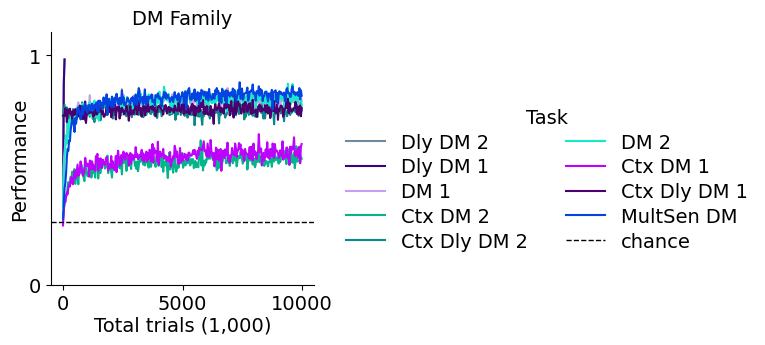

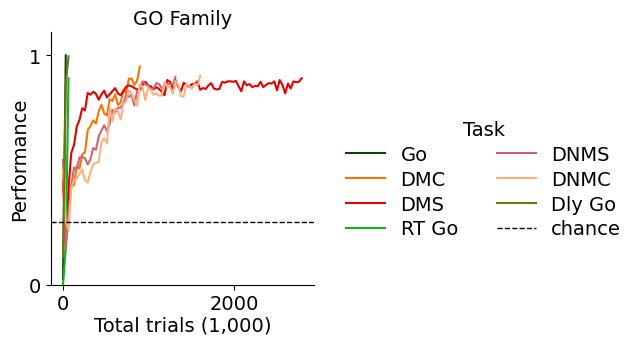

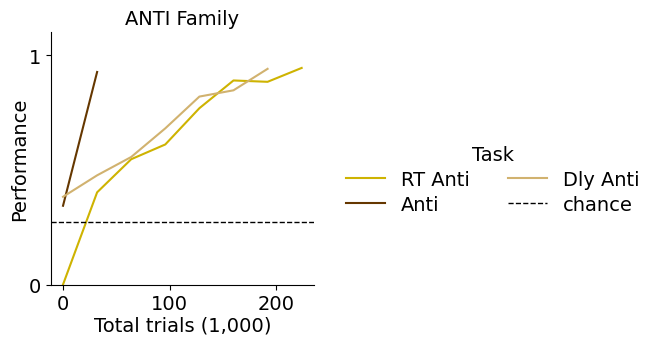

In [1]:
import matplotlib.pyplot as plt
import tools
import numpy as np
from task import generate_trials, rule_name, get_dist
_rule_color = {
    'reactgo': 'green',
            'delaygo': 'olive',
            'fdgo': 'forest green',
            'reactanti': 'mustard',
            'delayanti': 'tan',
            'fdanti': 'brown',
            'dm1': 'lavender',
            'dm2': 'aqua',
            'contextdm1': 'bright purple',
            'contextdm2': 'green blue',
            'multidm': 'blue',
            'delaydm1': 'indigo',
            'delaydm2': 'grey blue',
            'contextdelaydm1': 'royal purple',
            'contextdelaydm2': 'dark cyan',
            'multidelaydm': 'royal blue',
            'dmsgo': 'red',
            'dmsnogo': 'rose',
            'dmcgo': 'orange',
            'dmcnogo': 'peach'
            }

dm_family = ['dm1', 'dm2', 'contextdm1', 'contextdm2', 'multidm', 'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm']
go_family = ['reactgo', 'delaygo', 'fdgo', 'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']
anti_family = ['reactanti', 'delayanti', 'fdanti']

rule_color = {k: 'xkcd:'+v for k, v in _rule_color.items()}

def plot_performanceprogress(model_dirs, title=None):

    fs = 14 # fontsize
    w = 7.5
    h = 4.2
    transparent = False

    fig = plt.figure(figsize=(w,h))
    ax = fig.add_axes([0.1,0.25,0.35,0.6])
    lines = list()
    labels = list()

    rules = []
    x_plots = []
    costs = []
    perfs = []
    for model_dir in model_dirs:
        # Plot Training Progress
        log = tools.load_log(model_dir)
        hp = tools.load_hp(model_dir)
        trials = log['trials']
        x_plot = np.array(trials)/1000.
        rule = hp['rules'][0]
        cost = np.log10(log['cost_'+rule])
        perf = log['perf_'+rule]
        
        rules.append(rule)
        x_plots.append(x_plot)
        costs.append(cost)
        perfs.append(perf)

    for i, rule in enumerate(rules):
        # line = ax1.plot(x_plot, np.log10(cost_tests[rule]),color=color_rules[i%26])
        # ax2.plot(x_plot, perf_tests[rule],color=color_rules[i%26])
        line = ax.plot(x_plots[i], costs[i],
                    color=rule_color[rule])
        ax.plot(x_plots[i], perfs[i], color=rule_color[rule])
        lines.append(line[0])
        labels.append(rule_name[rule])

    ax.tick_params(axis='both', which='major', labelsize=fs)
    line = ax.axhline(0.275, color='black', linestyle='--', linewidth=1.)
    lines.append(line)
    labels.append('chance')
    ax.set_ylim([0, 1.1])
    ax.set_xlabel('Total trials (1,000)',fontsize=fs, labelpad=2)
    ax.set_ylabel('Performance',fontsize=fs, labelpad=0)
    ax.locator_params(axis='x', nbins=3)
    ax.set_yticks([0,1])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    if title is not None:
        ax.set_title(title,fontsize=fs)
    lg = fig.legend(lines, labels, title='Task',ncol=2,bbox_to_anchor=(0.47,0.5),
                    fontsize=fs,labelspacing=0.3,loc=6,frameon=False)
    plt.setp(lg.get_title(),fontsize=fs)
    # sfn = model_dir + '/figure/Performance_Progress'
    # plt.savefig(sfn, transparent=transparent)
    plt.show()

#get list of all file names with retrain_rnnbias_outputweights
import os
model_dirs = [d for d in os.listdir() if 'retrain_rnnbias_outputbias' in d]

# model_dirs = ['retrain_rnnbias_outputweights_contextdm1',
#                'retrain_rnnbias_outputweights_contextdm2', 
#                'retrain_rnnbias_outputweights_multidm',
#                'retrain_rnnbias_outputweights_delaydm1',
#                'retrain_rnnbias_outputweights_delaydm2',
#                'retrain_rnnbias_outputweights_reactgo',
#                'retrain_rnnbias_outputweights_fdgo',
#                'retrain_rnnbias_outputweights_dmsgo',
#                'retrain_rnnbias_outputweights_dmcgo',
#                'train_all_params_contextdelaydm1']

#split model dirs into those that conntain
#dm, go, and anti
dm_dirs = [d for d in model_dirs if d.split('_')[-1] in dm_family]
go_dirs = [d for d in model_dirs if d.split('_')[-1] in go_family]
anti_dirs = [d for d in model_dirs if d.split('_')[-1] in anti_family]

plot_performanceprogress(dm_dirs, title='DM Family')
plot_performanceprogress(go_dirs, title='GO Family')
plot_performanceprogress(anti_dirs, title='ANTI Family')


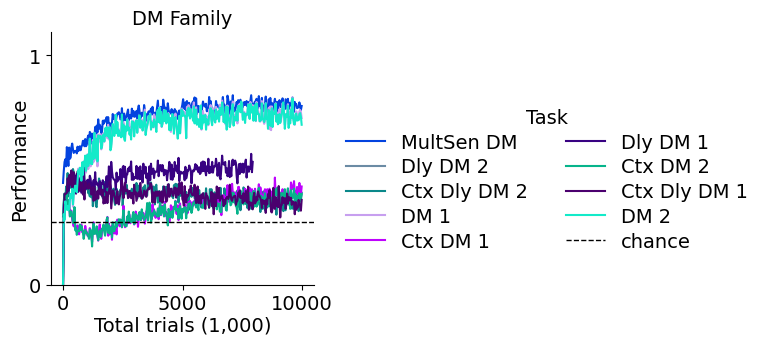

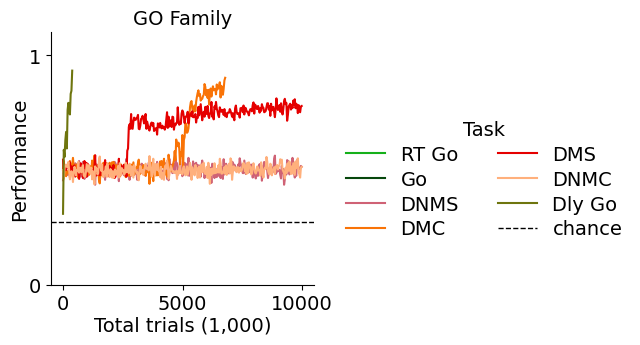

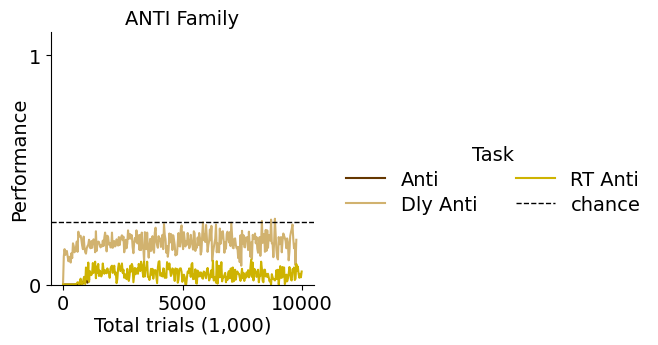

In [2]:
import matplotlib.pyplot as plt
import tools
import numpy as np
from task import generate_trials, rule_name, get_dist
_rule_color = {
    'reactgo': 'green',
            'delaygo': 'olive',
            'fdgo': 'forest green',
            'reactanti': 'mustard',
            'delayanti': 'tan',
            'fdanti': 'brown',
            'dm1': 'lavender',
            'dm2': 'aqua',
            'contextdm1': 'bright purple',
            'contextdm2': 'green blue',
            'multidm': 'blue',
            'delaydm1': 'indigo',
            'delaydm2': 'grey blue',
            'contextdelaydm1': 'royal purple',
            'contextdelaydm2': 'dark cyan',
            'multidelaydm': 'royal blue',
            'dmsgo': 'red',
            'dmsnogo': 'rose',
            'dmcgo': 'orange',
            'dmcnogo': 'peach'
            }

dm_family = ['dm1', 'dm2', 'contextdm1', 'contextdm2', 'multidm', 'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm']
go_family = ['reactgo', 'delaygo', 'fdgo', 'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']
anti_family = ['reactanti', 'delayanti', 'fdanti']

rule_color = {k: 'xkcd:'+v for k, v in _rule_color.items()}

def plot_performanceprogress(model_dirs, title=None):

    fs = 14 # fontsize
    w = 7.5
    h = 4.2
    transparent = False

    fig = plt.figure(figsize=(w,h))
    ax = fig.add_axes([0.1,0.25,0.35,0.6])
    lines = list()
    labels = list()

    rules = []
    x_plots = []
    costs = []
    perfs = []
    for model_dir in model_dirs:
        # Plot Training Progress
        log = tools.load_log(model_dir)
        hp = tools.load_hp(model_dir)
        trials = log['trials']
        x_plot = np.array(trials)/1000.
        rule = hp['rules'][0]
        cost = np.log10(log['cost_'+rule])
        perf = log['perf_'+rule]
        
        rules.append(rule)
        x_plots.append(x_plot)
        costs.append(cost)
        perfs.append(perf)

    for i, rule in enumerate(rules):
        # line = ax1.plot(x_plot, np.log10(cost_tests[rule]),color=color_rules[i%26])
        # ax2.plot(x_plot, perf_tests[rule],color=color_rules[i%26])
        line = ax.plot(x_plots[i], costs[i],
                    color=rule_color[rule])
        ax.plot(x_plots[i], perfs[i], color=rule_color[rule])
        lines.append(line[0])
        labels.append(rule_name[rule])

    ax.tick_params(axis='both', which='major', labelsize=fs)
    line = ax.axhline(0.275, color='black', linestyle='--', linewidth=1.)
    lines.append(line)
    labels.append('chance')
    ax.set_ylim([0, 1.1])
    ax.set_xlabel('Total trials (1,000)',fontsize=fs, labelpad=2)
    ax.set_ylabel('Performance',fontsize=fs, labelpad=0)
    ax.locator_params(axis='x', nbins=3)
    ax.set_yticks([0,1])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    if title is not None:
        ax.set_title(title,fontsize=fs)
    lg = fig.legend(lines, labels, title='Task',ncol=2,bbox_to_anchor=(0.47,0.5),
                    fontsize=fs,labelspacing=0.3,loc=6,frameon=False)
    plt.setp(lg.get_title(),fontsize=fs)
    # sfn = model_dir + '/figure/Performance_Progress'
    # plt.savefig(sfn, transparent=transparent)
    plt.show()

#get list of all file names with retrain_rnnbias_outputweights
import os
model_dirs = [d for d in os.listdir() if 'retrain_reactgo_rnnbias_outputbias' in d]

# model_dirs = ['retrain_rnnbias_outputweights_contextdm1',
#                'retrain_rnnbias_outputweights_contextdm2', 
#                'retrain_rnnbias_outputweights_multidm',
#                'retrain_rnnbias_outputweights_delaydm1',
#                'retrain_rnnbias_outputweights_delaydm2',
#                'retrain_rnnbias_outputweights_reactgo',
#                'retrain_rnnbias_outputweights_fdgo',
#                'retrain_rnnbias_outputweights_dmsgo',
#                'retrain_rnnbias_outputweights_dmcgo',
#                'train_all_params_contextdelaydm1']

#split model dirs into those that conntain
#dm, go, and anti
dm_dirs = [d for d in model_dirs if d.split('_')[-1] in dm_family]
go_dirs = [d for d in model_dirs if d.split('_')[-1] in go_family]
anti_dirs = [d for d in model_dirs if d.split('_')[-1] in anti_family]

plot_performanceprogress(dm_dirs, title='DM Family')
plot_performanceprogress(go_dirs, title='GO Family')
plot_performanceprogress(anti_dirs, title='ANTI Family')


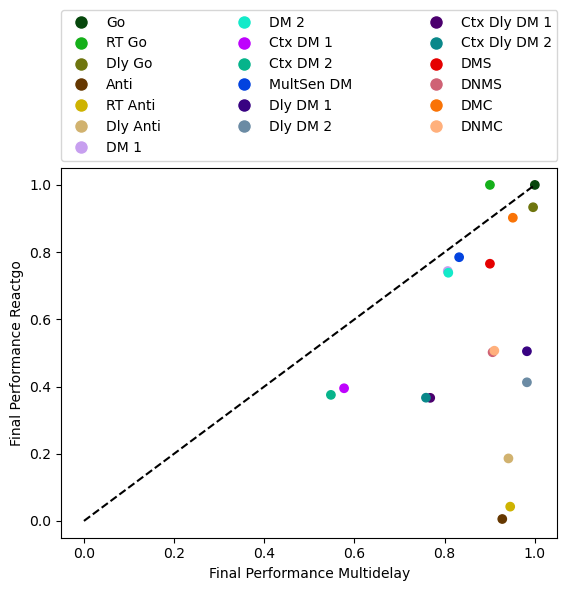

In [5]:
#get final performance for models from the reactgo pretraining and get the
#final performance of the same model from the multi_delay_dm pretraining

model_dirs_multidelay_ = [d for d in os.listdir() if 'retrain_rnnbias_outputbias' in d]
model_dirs_multidelay_.append('train_all_params_multidelaydm')

model_dirs_reactgo_ = [d for d in os.listdir() if 'retrain_reactgo_rnnbias_outputbias' in d]
model_dirs_reactgo_.append('train_all_params_reactgo')
#sort both lists to order the tasks according to this order to align with Robert's plots
task_order = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti', 'dm1', 
              'dm2', 'contextdm1', 'contextdm2', 'multidm', 'delaydm1', 'delaydm2', 
              'contextdelaydm1', 'contextdelaydm2', 'multidelaydm', 'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']
#sort the lists
model_dirs_multidelay_sort = [d for t in task_order for d in model_dirs_multidelay_ if t == d.split('_')[-1]]
model_dirs_reactgo_sort = [d for t in task_order for d in model_dirs_reactgo_ if t == d.split('_')[-1]]

models_multidelay = [d.split('_')[-1] for d in model_dirs_multidelay_sort]
models_reactgo = [d.split('_')[-1] for d in model_dirs_reactgo_sort]

#get the final performance for each model that exists in both lists
final_perf_multidelay = []
final_perf_reactgo = []
colors = []
labels = []
for i, model_dir in enumerate(model_dirs_multidelay_sort):
    if models_multidelay[i] in models_reactgo:
        log = tools.load_log(model_dir)
        hp = tools.load_hp(model_dir)
        rule = hp['rules'][0]
        perf = log['perf_'+rule]#[-1]
        if perf[-1] < 0.9:
            perf_smooth = np.average(perf[-100:])
        else:
            perf_smooth = perf[-1]
        final_perf_multidelay.append(perf_smooth)

        #find where the model is in the reactgo list
        reactgo_index = models_reactgo.index(models_multidelay[i])
        model_dir = model_dirs_reactgo_sort[reactgo_index]
        log = tools.load_log(model_dir)
        hp = tools.load_hp(model_dir)
        rule = hp['rules'][0]
        perf = log['perf_'+rule]#[-1]
        if perf[-1] < 0.9:
            perf_smooth = np.average(perf[-100:])
        else:
            perf_smooth = perf[-1]
        final_perf_reactgo.append(perf_smooth)

        colors.append(rule_color[rule])
        name = rule_name[rule]
        labels.append(name)

#plot final performance of models from multi_delay_dm pretraining vs reactgo pretraining
plt.figure()
plt.scatter(final_perf_multidelay, final_perf_reactgo, c=colors)
plt.xlabel('Final Performance Multidelay')
plt.ylabel('Final Performance Reactgo')
#plot dashed line of y=x
plt.plot([0,1],[0,1], 'k--')
#adjust the axes
#manually construct legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10, label=l) for c,l in zip(colors, labels)]
plt.legend(handles=handles, bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)
plt.show()

In [54]:
#calculate task variance..
#defined as the variance of a hidden unit activation across the test
#set for each task

from analysis import variance

def compute_variance_bias(model_dirs, rules=None, random_rotation=False):
    """Compute variance for all tasks.

    Args:
        model_dir: str, the path of the model directory
        rules: list of rules to compute variance, list of strings
        random_rotation: boolean. If True, rotate the neural activity.
    """
    for d in model_dirs:
        variance._compute_variance(d, rules, random_rotation)

compute_variance_bias(model_dirs_multidelay, rules=None, random_rotation=False)
compute_variance_bias(model_dirs_reactgo, rules=None, random_rotation=False)

Overwrite sigma_rec with 0.000
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


2024-10-27 15:29:09.643257: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2024-10-27 15:29:09.672721: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3000000000 Hz
2024-10-27 15:29:09.677746: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55696bc07e90 executing computations on platform Host. Devices:
2024-10-27 15:29:09.677786: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_fdgo/model.ckpt


2024-10-27 15:29:09.939825: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55696d9af190 executing computations on platform CUDA. Devices:
2024-10-27 15:29:09.939881: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-10-27 15:29:09.939902: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (1): Quadro RTX 5000, Compute Capability 7.5
2024-10-27 15:29:09.940391: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 0 with properties: 
name: Quadro RTX 5000 major: 7 minor: 5 memoryClockRate(GHz): 1.815
pciBusID: 0000:af:00.0
totalMemory: 15.74GiB freeMemory: 15.62GiB
2024-10-27 15:29:09.940470: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 1 with properties: 
name: Quadro RTX 5000 major: 7 minor: 5 memoryClockRate(GHz): 1.815
pciBusID: 0000:d8:00.0
totalMemory: 15.74GiB freeMemory: 15.62GiB
2024-10-27 15:29:09.943705: I tensorflow/core/c

Model restored from file: retrain_rnnbias_outputbias_fdgo/model.ckpt
['fdgo']


2024-10-27 15:29:10.636377: I tensorflow/stream_executor/dso_loader.cc:152] successfully opened CUDA library libcublas.so.10.0 locally


Variance saved at retrain_rnnbias_outputbias_fdgo/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_fdgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_reactgo/model.ckpt


2024-10-27 15:29:11.191803: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:11.191847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:11.191853: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:11.191858: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:11.191862: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:11.191979: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:11.192238: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_reactgo/model.ckpt
['reactgo']
Variance saved at retrain_rnnbias_outputbias_reactgo/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_reactgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_delaygo/model.ckpt


2024-10-27 15:29:11.738803: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:11.738846: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:11.738867: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:11.738870: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:11.738872: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:11.738957: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:11.739225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_delaygo/model.ckpt
['delaygo']
Variance saved at retrain_rnnbias_outputbias_delaygo/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_delaygo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_fdanti/model.ckpt


2024-10-27 15:29:12.167238: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:12.167296: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:12.167301: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:12.167304: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:12.167306: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:12.167399: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:12.167619: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_fdanti/model.ckpt
['fdanti']
Variance saved at retrain_rnnbias_outputbias_fdanti/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_fdanti/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_reactanti/model.ckpt


2024-10-27 15:29:12.684516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:12.684578: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:12.684583: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:12.684586: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:12.684588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:12.684684: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:12.684884: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_reactanti/model.ckpt
['reactanti']
Variance saved at retrain_rnnbias_outputbias_reactanti/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_reactanti/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_delayanti/model.ckpt


2024-10-27 15:29:13.103285: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:13.103324: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:13.103345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:13.103348: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:13.103351: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:13.103439: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:13.103673: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_delayanti/model.ckpt
['delayanti']
Variance saved at retrain_rnnbias_outputbias_delayanti/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_delayanti/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_dm1/model.ckpt


2024-10-27 15:29:13.525951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:13.526009: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:13.526014: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:13.526018: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:13.526020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:13.526105: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:13.526339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_dm1/model.ckpt
['dm1']
Variance saved at retrain_rnnbias_outputbias_dm1/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_dm1/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_dm2/model.ckpt


2024-10-27 15:29:14.135304: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:14.135363: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:14.135367: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:14.135370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:14.135373: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:14.135465: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:14.135719: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_dm2/model.ckpt
['dm2']
Variance saved at retrain_rnnbias_outputbias_dm2/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_dm2/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_contextdm1/model.ckpt


2024-10-27 15:29:14.597688: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:14.597748: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:14.597753: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:14.597756: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:14.597758: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:14.597842: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:14.598087: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_contextdm1/model.ckpt
['contextdm1']
Variance saved at retrain_rnnbias_outputbias_contextdm1/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_contextdm1/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_contextdm2/model.ckpt


2024-10-27 15:29:15.432804: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:15.432851: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:15.432856: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:15.432859: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:15.432862: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:15.432951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:15.433328: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_contextdm2/model.ckpt
['contextdm2']
Variance saved at retrain_rnnbias_outputbias_contextdm2/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_contextdm2/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_multidm/model.ckpt


2024-10-27 15:29:16.226610: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:16.226669: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:16.226673: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:16.226676: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:16.226679: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:16.226769: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:16.227023: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_multidm/model.ckpt
['multidm']
Variance saved at retrain_rnnbias_outputbias_multidm/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_multidm/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_delaydm1/model.ckpt


2024-10-27 15:29:16.886494: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:16.886552: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:16.886556: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:16.886560: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:16.886562: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:16.886649: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:16.886883: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_delaydm1/model.ckpt
['delaydm1']
Variance saved at retrain_rnnbias_outputbias_delaydm1/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_delaydm1/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_delaydm2/model.ckpt


2024-10-27 15:29:17.457830: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:17.457873: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:17.457893: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:17.457897: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:17.457899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:17.457986: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:17.458229: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_delaydm2/model.ckpt
['delaydm2']
Variance saved at retrain_rnnbias_outputbias_delaydm2/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_delaydm2/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_contextdelaydm1/model.ckpt


2024-10-27 15:29:17.935848: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:17.935915: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:17.935921: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:17.935924: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:17.935927: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:17.936025: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:17.936258: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_contextdelaydm1/model.ckpt
['contextdelaydm1']
Variance saved at retrain_rnnbias_outputbias_contextdelaydm1/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_contextdelaydm1/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_contextdelaydm2/model.ckpt


2024-10-27 15:29:19.097329: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:19.097388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:19.097392: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:19.097396: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:19.097398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:19.097488: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:19.097747: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_contextdelaydm2/model.ckpt
['contextdelaydm2']
Variance saved at retrain_rnnbias_outputbias_contextdelaydm2/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_contextdelaydm2/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from train_all_params_multidelaydm/model.ckpt


2024-10-27 15:29:20.084321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:20.084380: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:20.084384: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:20.084387: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:20.084390: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:20.084489: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:20.084717: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: train_all_params_multidelaydm/model.ckpt
['multidelaydm']
Variance saved at train_all_params_multidelaydm/variance_rule.pkl
Variance saved at train_all_params_multidelaydm/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_dmsgo/model.ckpt


2024-10-27 15:29:20.995332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:20.995374: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:20.995395: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:20.995398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:20.995400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:20.995489: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:20.995737: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_dmsgo/model.ckpt
['dmsgo']
Variance saved at retrain_rnnbias_outputbias_dmsgo/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_dmsgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_dmsnogo/model.ckpt


2024-10-27 15:29:21.445129: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:21.445173: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:21.445178: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:21.445181: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:21.445183: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:21.445275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:21.445529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_dmsnogo/model.ckpt
['dmsnogo']
Variance saved at retrain_rnnbias_outputbias_dmsnogo/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_dmsnogo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_dmcgo/model.ckpt


2024-10-27 15:29:21.994921: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:21.994980: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:21.994985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:21.994988: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:21.994991: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:21.995081: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:21.995344: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_dmcgo/model.ckpt
['dmcgo']
Variance saved at retrain_rnnbias_outputbias_dmcgo/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_dmcgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_rnnbias_outputbias_dmcnogo/model.ckpt


2024-10-27 15:29:22.442679: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:22.442720: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:22.442740: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:22.442743: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:22.442746: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:22.442839: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:22.443064: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_rnnbias_outputbias_dmcnogo/model.ckpt
['dmcnogo']
Variance saved at retrain_rnnbias_outputbias_dmcnogo/variance_rule.pkl
Variance saved at retrain_rnnbias_outputbias_dmcnogo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_fdgo/model.ckpt


2024-10-27 15:29:22.984222: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:22.984268: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:22.984289: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:22.984292: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:22.984294: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:22.984387: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:22.984589: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_fdgo/model.ckpt
['fdgo']
Variance saved at retrain_reactgo_rnnbias_outputbias_fdgo/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_fdgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_reactgo/model.ckpt


2024-10-27 15:29:23.393943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:23.393985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:23.394005: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:23.394008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:23.394011: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:23.394102: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:23.394332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_reactgo/model.ckpt
['reactgo']
Variance saved at retrain_reactgo_rnnbias_outputbias_reactgo/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_reactgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from train_all_params_reactgo/model.ckpt


2024-10-27 15:29:23.839990: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:23.840031: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:23.840051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:23.840055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:23.840057: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:23.840140: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:23.840372: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: train_all_params_reactgo/model.ckpt
['reactgo']
Variance saved at train_all_params_reactgo/variance_rule.pkl
Variance saved at train_all_params_reactgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_delaygo/model.ckpt


2024-10-27 15:29:24.394100: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:24.394144: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:24.394165: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:24.394168: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:24.394171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:24.394262: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:24.394478: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_delaygo/model.ckpt
['delaygo']
Variance saved at retrain_reactgo_rnnbias_outputbias_delaygo/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_delaygo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_fdanti/model.ckpt


2024-10-27 15:29:24.813384: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:24.813428: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:24.813433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:24.813436: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:24.813439: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:24.813520: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:24.813789: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_fdanti/model.ckpt
['fdanti']
Variance saved at retrain_reactgo_rnnbias_outputbias_fdanti/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_fdanti/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_reactanti/model.ckpt


2024-10-27 15:29:25.227998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:25.228057: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:25.228061: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:25.228064: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:25.228067: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:25.228156: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:25.228398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_reactanti/model.ckpt
['reactanti']
Variance saved at retrain_reactgo_rnnbias_outputbias_reactanti/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_reactanti/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_delayanti/model.ckpt


2024-10-27 15:29:25.770043: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:25.770103: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:25.770108: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:25.770111: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:25.770113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:25.770199: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:25.770413: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_delayanti/model.ckpt
['delayanti']
Variance saved at retrain_reactgo_rnnbias_outputbias_delayanti/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_delayanti/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_dm1/model.ckpt


2024-10-27 15:29:26.190495: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:26.190536: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:26.190556: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:26.190559: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:26.190562: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:26.190654: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:26.190901: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_dm1/model.ckpt
['dm1']
Variance saved at retrain_reactgo_rnnbias_outputbias_dm1/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_dm1/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_dm2/model.ckpt


2024-10-27 15:29:26.745322: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:26.745365: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:26.745386: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:26.745389: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:26.745391: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:26.745484: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:26.745714: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_dm2/model.ckpt
['dm2']
Variance saved at retrain_reactgo_rnnbias_outputbias_dm2/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_dm2/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_contextdm1/model.ckpt


2024-10-27 15:29:27.206184: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:27.206243: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:27.206247: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:27.206250: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:27.206253: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:27.206346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:27.206592: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_contextdm1/model.ckpt
['contextdm1']
Variance saved at retrain_reactgo_rnnbias_outputbias_contextdm1/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_contextdm1/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_contextdm2/model.ckpt


2024-10-27 15:29:27.881235: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:27.881277: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:27.881282: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:27.881285: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:27.881288: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:27.881378: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:27.881630: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_contextdm2/model.ckpt
['contextdm2']
Variance saved at retrain_reactgo_rnnbias_outputbias_contextdm2/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_contextdm2/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_multidm/model.ckpt


2024-10-27 15:29:28.664285: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:28.664329: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:28.664349: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:28.664353: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:28.664355: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:28.664447: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:28.664693: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_multidm/model.ckpt
['multidm']
Variance saved at retrain_reactgo_rnnbias_outputbias_multidm/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_multidm/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_delaydm1/model.ckpt


2024-10-27 15:29:29.341708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:29.341748: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:29.341768: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:29.341772: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:29.341774: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:29.341868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:29.342148: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_delaydm1/model.ckpt
['delaydm1']
Variance saved at retrain_reactgo_rnnbias_outputbias_delaydm1/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_delaydm1/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_delaydm2/model.ckpt


2024-10-27 15:29:29.857004: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:29.857062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:29.857067: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:29.857070: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:29.857073: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:29.857155: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:29.857429: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_delaydm2/model.ckpt
['delaydm2']
Variance saved at retrain_reactgo_rnnbias_outputbias_delaydm2/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_delaydm2/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_contextdelaydm1/model.ckpt


2024-10-27 15:29:30.437874: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:30.437917: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:30.437937: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:30.437940: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:30.437943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:30.438034: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:30.438261: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_contextdelaydm1/model.ckpt
['contextdelaydm1']
Variance saved at retrain_reactgo_rnnbias_outputbias_contextdelaydm1/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_contextdelaydm1/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_contextdelaydm2/model.ckpt


2024-10-27 15:29:31.345470: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:31.345513: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:31.345518: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:31.345521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:31.345523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:31.345614: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:31.345878: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_contextdelaydm2/model.ckpt
['contextdelaydm2']
Variance saved at retrain_reactgo_rnnbias_outputbias_contextdelaydm2/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_contextdelaydm2/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_dmsgo/model.ckpt


2024-10-27 15:29:32.347971: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:32.348034: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:32.348039: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:32.348042: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:32.348045: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:32.348159: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:32.348405: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_dmsgo/model.ckpt
['dmsgo']
Variance saved at retrain_reactgo_rnnbias_outputbias_dmsgo/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_dmsgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_dmsnogo/model.ckpt


2024-10-27 15:29:32.802671: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:32.802714: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:32.802735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:32.802738: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:32.802741: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:32.802823: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:32.803084: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_dmsnogo/model.ckpt
['dmsnogo']
Variance saved at retrain_reactgo_rnnbias_outputbias_dmsnogo/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_dmsnogo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_dmcgo/model.ckpt


2024-10-27 15:29:33.260468: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:33.260525: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:33.260529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:33.260533: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:33.260535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:33.260627: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:33.260897: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Model restored from file: retrain_reactgo_rnnbias_outputbias_dmcgo/model.ckpt
['dmcgo']
Variance saved at retrain_reactgo_rnnbias_outputbias_dmcgo/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_dmcgo/variance_epoch.pkl
Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from retrain_reactgo_rnnbias_outputbias_dmcnogo/model.ckpt
Model restored from file: retrain_reactgo_rnnbias_outputbias_dmcnogo/model.ckpt
['dmcnogo']
Variance saved at retrain_reactgo_rnnbias_outputbias_dmcnogo/variance_rule.pkl
Variance saved at retrain_reactgo_rnnbias_outputbias_dmcnogo/variance_epoch.pkl


2024-10-27 15:29:33.839555: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-10-27 15:29:33.839620: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-10-27 15:29:33.839625: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-10-27 15:29:33.839628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-10-27 15:29:33.839631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-10-27 15:29:33.839718: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15192 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-10-27 15:29:33.839940: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15192 M

Choosing 12 clusters


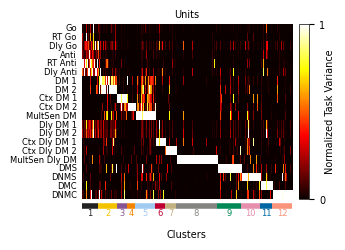

In [58]:
from analysis import clustering
CA = clustering.Analysis(model_dirs_multidelay, data_type='rule')
CA.plot_variance()

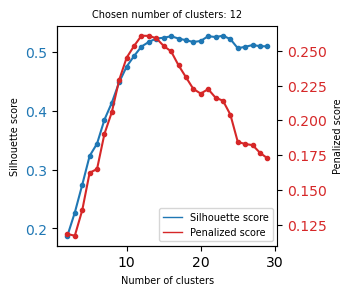

In [56]:
CA.plot_cluster_score()

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 638 / 638
[t-SNE] Mean sigma: 0.002352


/home/dburnham/miniconda3/envs/rnn_mult/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.492411
[t-SNE] KL divergence after 1000 iterations: 0.357464


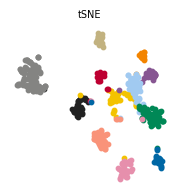

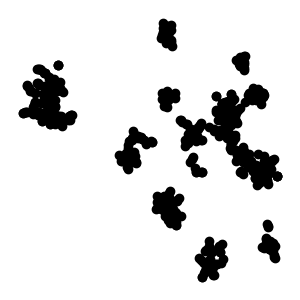

In [57]:
CA.plot_2Dvisualization(method='tSNE')